In [10]:
import librosa
import scipy
import random
import tqdm
import numpy as np
import matplotlib.pyplot as plt

from notebook_utils import get_audio_list
#constantes
RIR_PATH = '/home/mrtn/Documents/TESIS/de-reverb/bases de datos/data/impulsos'
SPEECH_PATH = '/home/mrtn/Documents/TESIS/de-reverb/bases de datos/data/speech/train-clean-100'
Q_e = 32
LM = 5
Pd = 9

In [26]:
rir_list = get_audio_list(RIR_PATH)
speech_list = get_audio_list(SPEECH_PATH)

In [27]:
#generar espectrogramas de mismas dimenciones
rir, fs_rir = librosa.load(rir_list[0], sr=16000)
speech, fs_speech = librosa.load(speech_list[0], sr=16000)
assert fs_rir == fs_speech

#Corto el delay y normalizo el impulso
rir = rir[np.argmax(abs(rir)):]/rir[np.argmax(abs(rir))]
rir_early = rir[:Q_e]

#Convoluciono y limito al largo del speech
reverb = scipy.signal.fftconvolve(speech, rir)[:len(speech)]
early_reverb = scipy.signal.fftconvolve(speech, rir_early)[:len(speech)]

#Calculos los espectro STFT y me quedo con el modulo
reverb_spec = librosa.stft(reverb, n_fft=512, hop_length=160, win_length=400, window=scipy.signal.windows.hamming)
early_reverb_spec = librosa.stft(early_reverb, n_fft=512, hop_length=160, win_length=400, window=scipy.signal.windows.hamming)
assert reverb_spec.shape == early_reverb_spec.shape
reverb_spec = abs(reverb_spec)
early_reverb_spec = abs(early_reverb_spec)

#Normalizacion(?)


In [28]:
def generate_specs(rir, speech):
    #Corto el delay y normalizo el impulso
    rir = rir[np.argmax(abs(rir)):]/rir[np.argmax(abs(rir))]
    rir_early = rir[:Q_e]

    #Convoluciono y limito al largo del speech
    reverb = scipy.signal.fftconvolve(speech, rir)[:len(speech)]
    early_reverb = scipy.signal.fftconvolve(speech, rir_early)[:len(speech)]

    #Calculos los espectro STFT y me quedo con el modulo
    reverb_spec = librosa.stft(reverb, n_fft=512, hop_length=160, win_length=400, window=scipy.signal.windows.hamming)
    early_reverb_spec = librosa.stft(early_reverb, n_fft=512, hop_length=160, win_length=400, window=scipy.signal.windows.hamming)
    assert reverb_spec.shape == early_reverb_spec.shape
    reverb_spec = abs(reverb_spec)
    early_reverb_spec = abs(early_reverb_spec)
    return reverb_spec, early_reverb_spec

In [42]:
maxs = []
mins = []


for speech_file in tqdm.tqdm(random.sample(speech_list, 1000)):
    rir_file = random.choice(rir_list)
    speech, _ = librosa.load(speech_file, sr=16000)
    rir, _ = librosa.load(rir_file, sr=16000)
    reverb_spec, early_reverb_spec = generate_specs(rir, speech)
    maxs.append(reverb_spec.max())
    maxs.append(early_reverb_spec.max())
    mins.append(reverb_spec.min())
    mins.append(early_reverb_spec.min())
    

  3%|▎         | 29/1000 [00:04<02:46,  5.84it/s]


KeyboardInterrupt: 

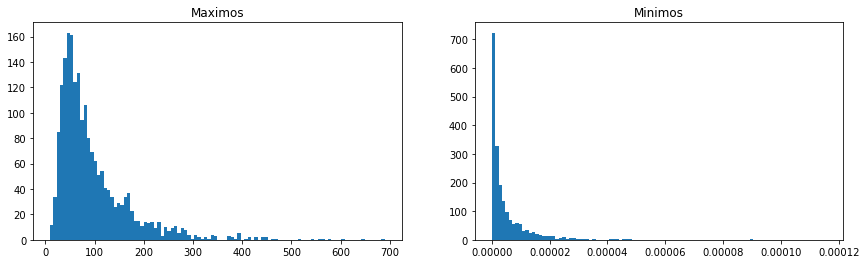

In [41]:
plt.subplot(1,2,1)
plt.title('Maximos')
plt.hist(maxs, bins=100)

plt.subplot(1,2,2)
plt.title('Minimos')
plt.hist(mins, bins=100)
plt.plot()
plt.subplots_adjust(right=2)